In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import banana_lib as sz
import banana_plot as bp
from scipy.optimize import curve_fit


desktop = r"C:\Users\Szymek\Desktop"
paths = {
    "desktop": desktop,
    "matrices": desktop + r"\LAMMPS_matrices",
    "matrices_centers": desktop + r"\LAMMPS_matrices\centers_matrices",
    "matrices_directors": desktop + r"\LAMMPS_matrices\directors_matrices",
    "smectic_params": desktop + r"\smectic_params_new.txt",
    "images": desktop + r"\checkpoint_01.03.24\images",
    "example": desktop + r"\LAMMPS_matrices\centers_matrices\centers_screen_bulk_6k_0.32.txt",
    "test": desktop + r"\test.png"
    }



# USE EXTENT ON AXES
# MERGE TAU AND LAMBDA IMAGES
# ADD AVG DIRECTOR SCATTER PLOTS AT BULK/WALL
# PASS FIGURE AS FUNCTION ARGUMENT AND RETURN THE SAME UPDATED FIGURE


In [3]:
# read correlation data from "smectic_params" file
x = 150
density, lambd, varLambd, amplitude, varAmplitude = [], [], [], [], []

with open(paths["smectic_params"], "r") as f:
    for line in f:
        line = line.strip().split("=")
        # print(line)
        if line[0] == "d ":
            density.append(line[-1])
        elif line[0] == "A ": 
            amplitude.append(line[-1])
        elif line[0] == "varA ":
            varAmplitude.append(line[-1])
        elif line[0] == "lambda ":
            # clamp correlation length to 300 pixels for readability
            l = line[-1]
            if float(l) > 7.:
                l = 7.
            lambd.append(l)
        elif line[0] == "varLambda ": 
            l = line[-1]
            if float(l) > 0.5:
                l = 0.5
            varLambd.append(l)
        else:
            continue
        
density = np.array(density, dtype=float)
amplitude = np.array(amplitude, dtype=float)
Damplitude = np.array(varAmplitude, dtype=float)
lambd = np.array(lambd, dtype=float)
Dlambd = np.array(varLambd, dtype=float)
# lambd *= 1/7      # rescale correlation length from pixels to box width

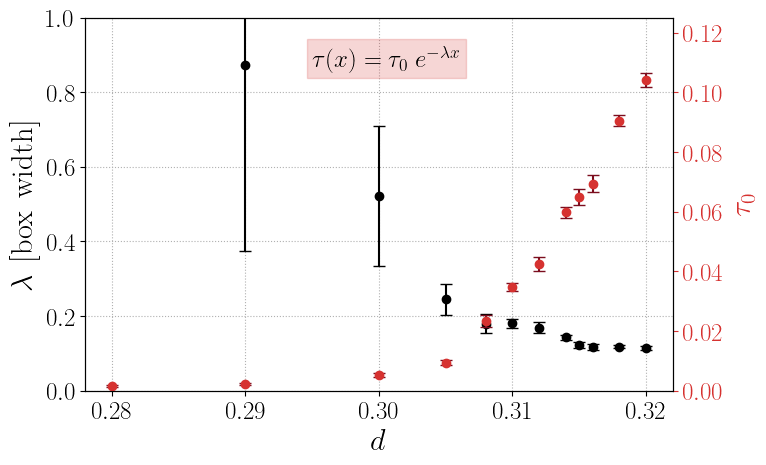

In [4]:
# file = paths["images"] + "\correlation_lengths_vs_density.png"
tau_test = paths["test"]
lambda_test = paths["test"]
red = '#D63230'         # persian red
darker_red = '#7B0D1E'  # burgundy
lambda_options = {'textpos': (0.295, 0.87), 'text': r'$\tau(x) = \tau_0 \;e^{-\lambda x}$', 'xlabel': r'$d$', 'ylabel': r"$\lambda \hspace{0.3cm} \mathrm{[box\;\,width]}$", 'grid_style': 'dotted'}
tau_options = {'xlabel': r'$d$', 'ylabel': r"$\tau_0$", 'c': red, 'ecolor': darker_red, 'ctick': red, 'cylabel': red, 'ylim': (0, 0.125)}


fig1, ax1 = plt.subplots(figsize = (8, 5), sharex=False, sharey=False)

# lambda plot
ax1 = bp.ErrorPlotter(density, lambd, Dlambd, target_path=tau_test, plot_attr=lambda_options).plot(ax1, show=False)

# tau plot
ax2 = ax1.twinx()
ax2 = bp.ErrorPlotter(density, amplitude, Damplitude, target_path=lambda_test, plot_attr=tau_options).plot(ax2, show=False)

# fig1.legend(loc='center left')
plt.show()
# plt.savefig(paths['images'] + '\correlation_lengths.png')

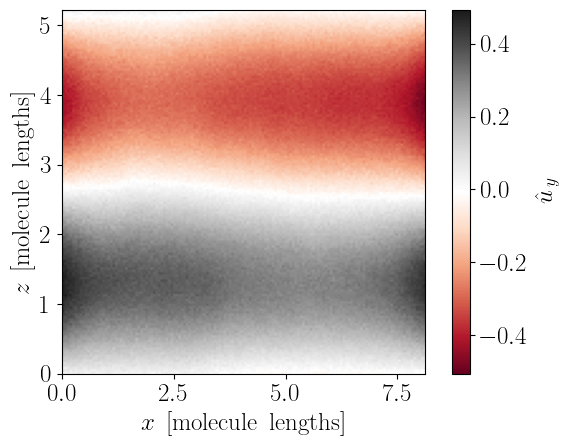

In [5]:
# file = paths["matrices_centers"] + "\centers_screen_bulk_6k_0.32.txt"
file = paths["matrices_directors"] + "\directors_screen_bulk_6k_0.31.txt"

options = {'xlabel': r"$x\:\:[\mathrm{molecule\:\:lengths}]$", 
           'ylabel': r"$z\:\:[\mathrm{molecule\:\:lengths}]$", 
           'extent': [0, 70/8.62, 0, 45/8.62], 'cmap': 'RdGy', 'cbarlabel': r'$\hat{u}_{\,y}$'}

fig, ax = plt.subplots()
ax = bp.HeatmapPlotter(file, '', plot_attr=options).plot(fig, ax, show=False)
# bp.HeatmapPlotter(file, paths["test"], plot_attr=options).save()

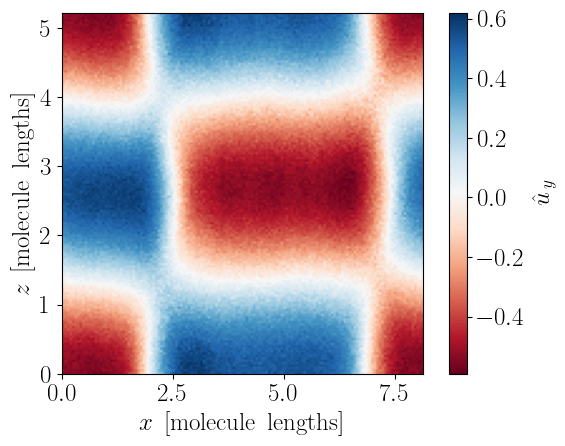

In [22]:
# file = paths["matrices_centers"] + "\centers_screen_bulk_6k_0.32.txt"
# file = paths["matrices_directors"] + "\directors_screen_bulk_6k_0.31.txt"
file = paths["matrices"] + "\directors_screen_bulk_two_domains_0.32.txt"
options = {'xlabel': r"$x\:\:[\mathrm{molecule\:\:lengths}]$", 
           'ylabel': r"$z\:\:[\mathrm{molecule\:\:lengths}]$", 
           'extent': [0, 70/8.62, 0, 45/8.62], 'cmap': 'RdBu', 'cbarlabel': r'$\hat{u}_{\,y}$'}

fig, ax = plt.subplots()
ax = bp.HeatmapPlotter(file, '', plot_attr=options).plot(fig, ax, show=False)
# bp.HeatmapPlotter(file, paths["test"], plot_attr=options).save()